Import MongoDB Connection String

In [1]:
import json

with open('C:\\Users\\webbr\\OneDrive\\Documents\\GitHub\\Secrets.json', 'r') as pw:
    data = json.load(pw)

    key = data["examplemongodb"]


print(f"My string is {len(key)} characters long")

My string is 72 characters long


Connect to MongoDB

In [2]:
import pymongo
import certifi

ConnectionString = data["examplemongodb"]

client = pymongo.MongoClient(ConnectionString, tlsCAFile=certifi.where())

DA320Database = client["MovieDatabase"]

AllCollections = DA320Database.list_collection_names()

print(f"Using MongoDB version {client.server_info()['version']}")
print(f"This Database has the collections {AllCollections}")

Using MongoDB version 6.0.6
This Database has the collections ['MetaCritic', 'IMDB', 'IMDB_Pipeline_View']


Import IMDB Information

In [3]:
import pandas as pd

cursor = DA320Database["IMDB"].find()

IMDB = pd.DataFrame(cursor)

IMDB.head()

,_id,id,title,runtime,user_rating,votes,mpaa_rating,release_date,budget,opening_weekend,gross_sales,genres,cast,director,producer,company
0,6456edd6d293f26c2693b428,77631,Grease,110.0,7.2,265183,TV-14::(D),6/13/1978,6000000.0,60759.0,394955690.0,"Comedy, Musical, Romance","John Travolta, Olivia Newton-John, Stockard Ch...",Randal Kleiser,"Allan Carr, Neil A. Machlis, Robert Stigwood","Paramount Pictures, Robert Stigwood Organizati..."
1,6456edd6d293f26c2693b429,78346,Superman,143.0,7.4,172769,TV-PG::(LV),12/10/1978,55000000.0,7465343.0,166200000.0,"Action, Adventure, Sci-Fi","Marlon Brando, Gene Hackman, Christopher Reeve...",Richard Donner,"Charles Greenlaw, Richard Lester, Alexander Sa...","Dovemead Films, Film Export A.G., Internationa..."
2,6456edd6d293f26c2693b42a,77416,The Deer Hunter,183.0,8.1,334827,R,12/8/1978,15000000.0,NaN,NaN,"Drama, War","Robert De Niro, John Cazale, John Savage, Chri...",Michael Cimino,"Joann Carelli, Michael Cimino, Michael Deeley,...","EMI Films, Universal Pictures"
3,6456edd6d293f26c2693b42b,77651,Halloween,91.0,7.7,267109,TV-14,10/25/1978,300000.0,NaN,70000000.0,"Horror, Thriller","Donald Pleasence, Jamie Lee Curtis, Nancy Kyes...",John Carpenter,"Moustapha Akkad, John Carpenter, Debra Hill, K...","Compass International Pictures, Falcon Interna..."
4,6456edd6d293f26c2693b42c,77975,National Lampoon's Animal House,109.0,7.4,119917,"TV-14::(DLSV, TV Rating.)",7/27/1978,3000000.0,201747.0,3371006.0,Comedy,"Tom Hulce, Stephen Furst, Mark Metcalf, Mary L...",John Landis,"Ivan Reitman, Matty Simmons","Universal Pictures, Oregon Film Factory, Stage..."


Cleanse and Transform the Data

In [4]:
IMDB.release_date = pd.to_datetime(IMDB.release_date, errors="coerce")
IMDB.budget = pd.to_numeric(IMDB.budget, errors="coerce")
IMDB.runtime = pd.to_numeric(IMDB.runtime, errors="coerce")

Create Charts for Runtime and Budget

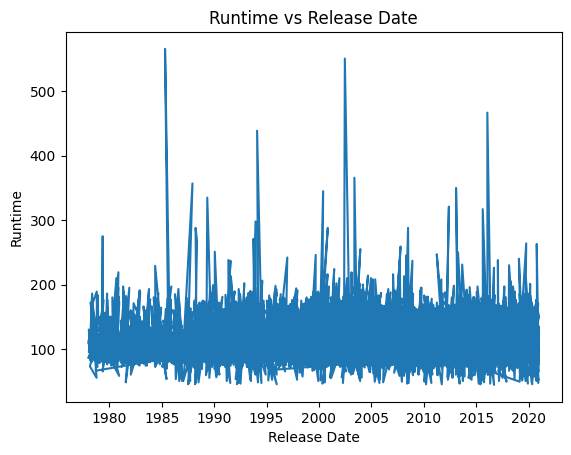

In [5]:
import matplotlib.pyplot as plot

plot.plot(IMDB["release_date"], IMDB["runtime"])
plot.xlabel("Release Date")
plot.ylabel("Runtime")
plot.title("Runtime vs Release Date")
plot.show()


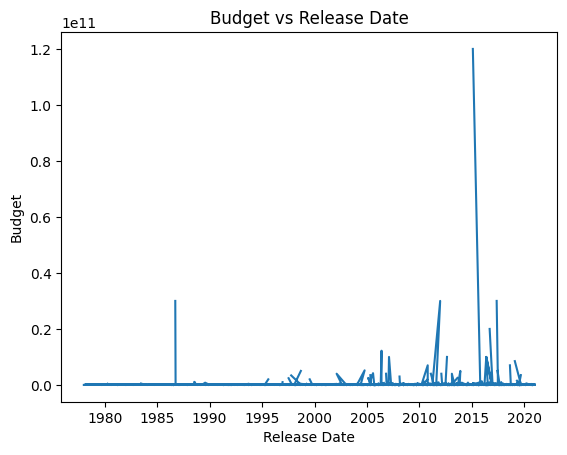

In [6]:
import matplotlib.pyplot as plot

plot.plot(IMDB["release_date"], IMDB["budget"])
plot.xlabel("Release Date")
plot.ylabel("Budget")
plot.title("Budget vs Release Date")
plot.show()


Find Outliers From Runtime and Budget

In [7]:
import pandas as pd

query = {"runtime": { "$gt": (300) } }

cursor = DA320Database[IMDB].find(query)

IMDB = pd.DataFrame(cursor)

IMDB.head()

TypeError: name must be an instance of str